# Pixel access

opencv in python  
其容器是利用numpy來承接  
可以直接利用numpy的操作來操作其pixel

首先還是先建立matplotlib的畫圖

In [1]:
import matplotlib.pyplot as plt

def plotimg(img,size=None,transfer=True,colormap=None):
    plt.figure(figsize=size)
    plt.xticks([])
    plt.yticks([])
    if img.ndim == 2:
        plt.imshow(img,cmap=colormap)
    else:
        if transfer == True:
            plt.imshow(img[:,:,::-1],cmap=colormap)
        else:
            plt.imshow(img,cmap=colormap)

## 創建一個空白圖

創立兩張白圖  
一張三通道，一張一通道，來看看差別

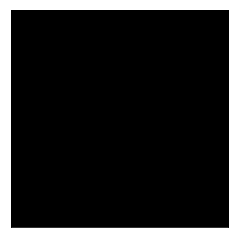

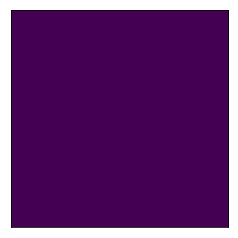

In [2]:
import numpy as np
import cv2 as cv

empty_img_3_chanel = np.zeros((150,150,3))
empty_img_1_chanel = np.zeros((150,150))

plotimg(empty_img_3_chanel)
plotimg(empty_img_1_chanel)

單通道上的黑色看起來像紫色   
是因為imshow的cmap預設並非灰階顯示  
加上去以後就能正常顯示 

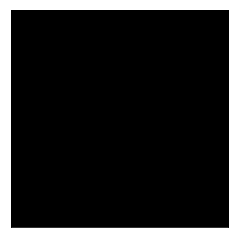

In [3]:
plotimg(empty_img_1_chanel,colormap='gray')

## Pixel access

比起用for loop來一個一個pixel access  
numpy可以更快的去存取陣列中的值  
而且其背後會利用平行運算的方式加速  

把剛剛設定的圖隨意一塊正方形轉成白色 RGB =(255,255,255)

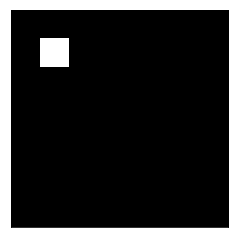

In [4]:
empty_img_3_chanel = empty_img_3_chanel.astype('uint8')
empty_img_3_chanel[20:40,20:40,:]= 255
plotimg(empty_img_3_chanel)

## 圖片檔案的通道顏色
接下來把圖檔的三通道影像拆出來看看

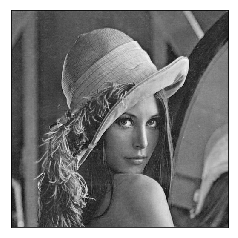

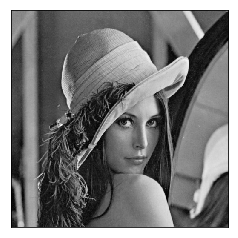

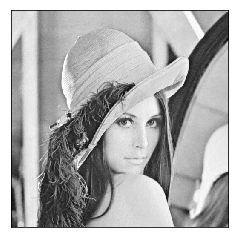

In [11]:
import os

root = os.getcwd()
img_path = os.path.join(root,'Image/lena.jpg')
img = cv.imread(img_path)

plotimg(img[:,:,0],colormap='gray') # BLUE channel
plotimg(img[:,:,1],colormap='gray') # GREEN channel
plotimg(img[:,:,2],colormap='gray') # RED channel

## 噪點

對剛剛讀進來的圖像加入白噪點

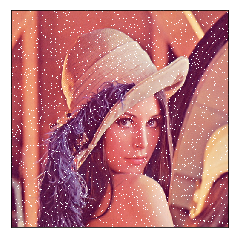

In [12]:
for i in range(10000):
    img[np.random.randint(0,img.shape[0]),np.random.randint(0,img.shape[1]),:]=255

plotimg(img)

## 存檔

把剛剛加入噪點的圖存起來  
以利之後使用

In [14]:
target_path = os.path.join(root,'Image/lena_noise.jpg')
cv.imwrite(target_path, img)

True